In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

### Coding Activity 01: Plot a Sigmoid Function

* write some code to evaluate and plot the sigmoid function
* hint: you can use np.exp()

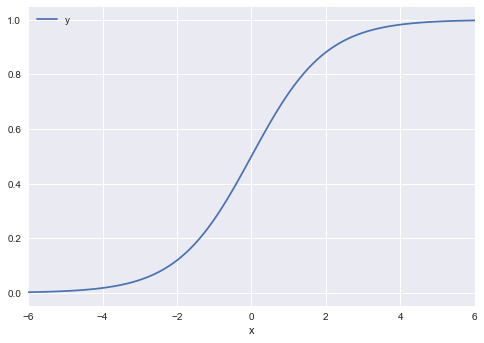

In [6]:
x = np.linspace(-6, 6, 100)

def sigmoid(x):
    return 1/(1+np.exp(-x))

y = sigmoid(x)

result = pd.DataFrame(data={'x':x, 'y': y})
result.plot(x='x', y='y');

### Coding Activity 2: Wager those odds!

In [4]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds)

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1/(1+np.exp(-logit))

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

#### Calculate the probabilities corresponding to the above odds!

In [16]:
for odds in odds_set:
    print (odds, "  ", sigmoid_func(logit_func(odds)))

5.0    0.833333333333
20.0    0.952380952381
1.1    0.52380952381
1.8    0.642857142857
1.6    0.615384615385


### Coding Activity 03: Logistic Regression

In [17]:
df = pd.read_csv('../data/collegeadmissions.csv')

In [18]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [19]:
df = pd.get_dummies(df, columns=['rank'], drop_first=True)

In [20]:
df.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


#### What's the bias, or prior probability for this dataset?

In [21]:
df.admit.mean()

0.3175

##### Fit a simple logistic regression with a single feature first

In [34]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()(df[['gre']], df['admit'])


In [35]:
lm.fit(df[['gre']], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Explore the coef_ value.  Does this represent the odds or logit (log odds)?

In [36]:
lm.coef_

array([[ 0.00234884]])

In [37]:
np.exp(lm.coef_)

array([[ 1.0023516]])

In [38]:
lm.score(df[['gre']], df['admit'])

0.6825

##### Question: How do you interpret this number?

#### Fitting a more complex Logistic Regression

In [44]:
features = ['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4']
label = 'admit'

lm.fit(df.loc[:, features], df[label])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
print ('Coefficients:', lm.coef_)
print ('Intercept:', lm.intercept_)
print ('Bias:', df.admit.mean())

Coefficients: [[ 0.00181821  0.24353859 -0.6058383  -1.17492442 -1.37839849]]
Intercept: [-1.87278856]
Bias: 0.3175


##### Interpreting the odds, which features have the most impact on admission rate?  Which features have the least?

In [46]:
params = {'intercept': lm.intercept_[0]}
params.update(dict(zip(features, lm.coef_[0])))
params = pd.Series(params).sort_index()
params

gpa          0.243539
gre          0.001818
intercept   -1.872789
rank_2      -0.605838
rank_3      -1.174924
rank_4      -1.378398
dtype: float64

In [47]:
np.exp(params)

gpa          1.275756
gre          1.001820
intercept    0.153694
rank_2       0.545617
rank_3       0.308842
rank_4       0.251982
dtype: float64

##### What is the accuracy of your model?

In [48]:
lm.score(df.loc[:, features], df['admit'])

0.70750000000000002

### Coding Activity 04: Kaggle Titanic & Classification Metrics

Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, \
precision_score, auc

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

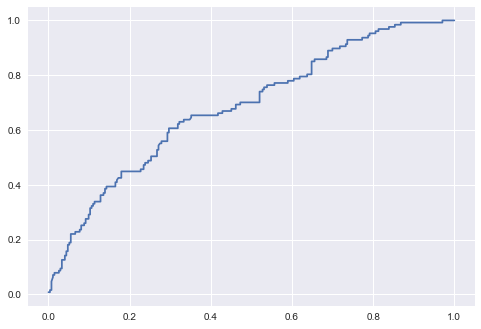

In [50]:
actuals = lm.predict(df[features]) 
probas = lm.predict_proba(df[features])
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1]);

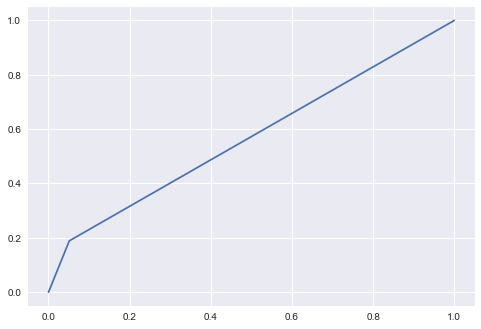

In [51]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1]);

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [52]:
roc_auc_score(df['admit'], lm.predict(df[features]))

0.56884716333535223

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [53]:
titanic = pd.read_csv('../data/titanic.csv')

In [54]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Pclass, dtype: object

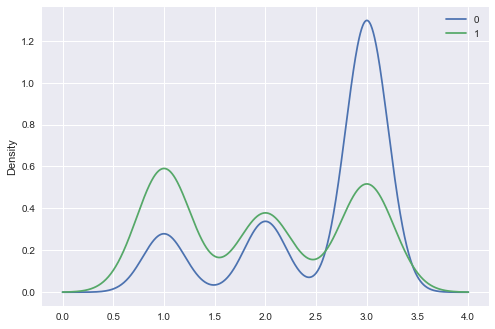

In [56]:
titanic.groupby('Survived').Pclass.plot(kind='kde', legend=True)

          Survived    Pclass       Age
Survived  1.000000 -0.338481 -0.077221
Pclass   -0.338481  1.000000 -0.369226
Age      -0.077221 -0.369226  1.000000


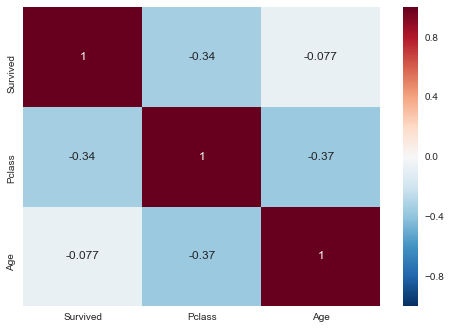

In [61]:
correlations = titanic[['Survived', 'Pclass', 'Age']].corr()
print(correlations)
sns.heatmap(correlations, annot=True)

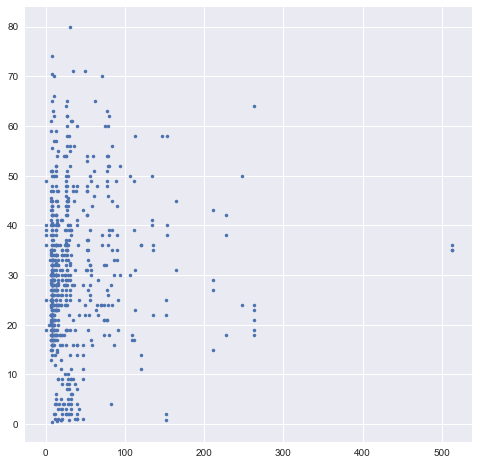

In [89]:
plt.plot(titanic.Fare, titanic.Age, '.');
plt.gcf().set_size_inches(8,8);

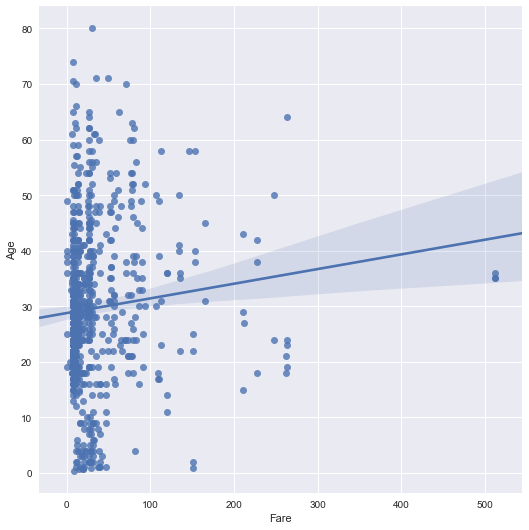

In [72]:
sns.lmplot('Fare', 'Age', titanic);
plt.gcf().set_size_inches(8,8)

In [84]:
#take original dataset
log_columns = ['Fare', 'Age',]
#copy original dataset
log_titanic = titanic.copy()
#apply log10--"log-log relationship"
log_titanic[log_columns] = log_titanic[log_columns].apply(np.log10)

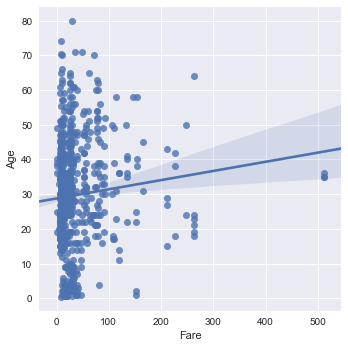

In [85]:
sns.lmplot('Fare', 'Age', titanic);

In [93]:
import statsmodels.formula.api as smf

X = titanic[['Age']]
y = titanic['Survived']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=titanic).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.271
Date:                Mon, 21 Aug 2017   Prob (F-statistic):             0.0391
Time:                        21:27:23   Log-Likelihood:                -503.28
No. Observations:                 714   AIC:                             1011.
Df Residuals:                     712   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4838      0.042     11.576      0.000       0.402       0.566
X             -0.0026      0.001     -2.067      0.039      -0.005      -0.000
==============================================================================
Omnibus:                       16.419   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.965
Skew:                           0.380   Prob(JB):                     3.99e-26
Kurtosis:                       1.168   Cond. No.                         75.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn import grid_search, cross_validation

features = ['is_male', 'Pclass_1', 'Pclass_2', 'Fare', 'Age', 'had_parents', 'had_siblings']
# feature_set = titanic[features]
feature_set = titanic.drop('Survived', axis=1)
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(titanic), n_folds=10),
    scoring='roc_auc'
)

gs.fit(feature_set, titanic.Survived)
gs.grid_scores_
#print gs.best_estimator_

In [94]:
best_model = gs.best_estimator_
params = best_model.get_params()
pd.Series(params).loc[['C', 'class_weight']]

NameError: name 'gs' is not defined